In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
DATA_FOLDER_PATH = os.getcwd() + '/../data/KS VERI/KS10/'

In [3]:
FILE_NAME = 'KS10_UDP_TUKETIM_5dk.xlsx'

In [4]:
PATH = DATA_FOLDER_PATH + FILE_NAME

In [5]:
# read the excel file
UDP_TUKETIM_DF = pd.read_excel(PATH, sheet_name='Sheet2', skiprows=7, usecols='A:C')[:-1]
UDP_TUKETIM_DF['Timestamp'] = pd.to_datetime(UDP_TUKETIM_DF['Timestamp'])
UDP_TUKETIM_DF.columns = ['Timestamp', 'KS10_1_UDP Real Energy Into the Load (kWh)', 'KS10_2_UDP Real Energy Into the Load (kWh)']
UDP_TUKETIM_DF

/var/folders/mt/twk6ky9932jbskz7g_w2xmpw0000gn/T/ipykernel_62431/2908687314.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  UDP_TUKETIM_DF['Timestamp'] = pd.to_datetime(UDP_TUKETIM_DF['Timestamp'])


,Timestamp,KS10_1_UDP Real Energy Into the Load (kWh),KS10_2_UDP Real Energy Into the Load (kWh)
0,2023-04-01 00:05:00,2569720.75,2499977.50
1,2023-04-01 00:10:00,2569725.75,2499982.50
2,2023-04-01 00:15:00,2569729.00,2499985.50
3,2023-04-01 00:20:00,2569734.00,2499990.25
4,2023-04-01 00:25:00,2569737.00,2499993.50
...,...,...,...
60309,2023-10-30 23:50:00,2806472.00,2727209.25
60310,2023-10-30 23:55:00,2806474.50,2727211.75
60311,2023-10-31 00:00:00,2806479.00,2727216.25
60312,NaT,NaN,NaN


In [6]:
UDP_TUKETIM_DF['KS10_1_Load_Diff'] = UDP_TUKETIM_DF['KS10_1_UDP Real Energy Into the Load (kWh)'].diff()
UDP_TUKETIM_DF['KS10_2_Load_Diff'] = UDP_TUKETIM_DF['KS10_2_UDP Real Energy Into the Load (kWh)'].diff()
UDP_TUKETIM_DF = UDP_TUKETIM_DF[1:]
UDP_TUKETIM_DF

,Timestamp,KS10_1_UDP Real Energy Into the Load (kWh),KS10_2_UDP Real Energy Into the Load (kWh),KS10_1_Load_Diff,KS10_2_Load_Diff
1,2023-04-01 00:10:00,2569725.75,2499982.50,5.00,5.00
2,2023-04-01 00:15:00,2569729.00,2499985.50,3.25,3.00
3,2023-04-01 00:20:00,2569734.00,2499990.25,5.00,4.75
4,2023-04-01 00:25:00,2569737.00,2499993.50,3.00,3.25
5,2023-04-01 00:30:00,2569742.00,2499998.00,5.00,4.50
...,...,...,...,...,...
60309,2023-10-30 23:50:00,2806472.00,2727209.25,4.25,4.25
60310,2023-10-30 23:55:00,2806474.50,2727211.75,2.50,2.50
60311,2023-10-31 00:00:00,2806479.00,2727216.25,4.50,4.50
60312,NaT,NaN,NaN,NaN,NaN


In [7]:
# find 0 values in KS10_1_Load_Diff and KS10_2_Load_Diff columns
UDP_TUKETIM_DF[UDP_TUKETIM_DF['KS10_1_Load_Diff'] == 0]


,Timestamp,KS10_1_UDP Real Energy Into the Load (kWh),KS10_2_UDP Real Energy Into the Load (kWh),KS10_1_Load_Diff,KS10_2_Load_Diff
309,2023-04-02 01:50:00,2570986.25,2501188.25,0.0,0.00
310,2023-04-02 01:55:00,2570986.25,2501188.25,0.0,0.00
311,2023-04-02 02:00:00,2570986.25,2501188.25,0.0,0.00
312,2023-04-02 02:05:00,2570986.25,2501188.25,0.0,0.00
313,2023-04-02 02:10:00,2570986.25,2501188.25,0.0,0.00
...,...,...,...,...,...
378,2023-04-02 07:45:00,2570986.25,2501188.25,0.0,0.00
379,2023-04-02 07:50:00,2570986.25,2501188.25,0.0,0.00
380,2023-04-02 07:55:00,2570986.25,2501188.25,0.0,0.00
50053,2023-09-25 09:15:00,2768594.25,2690919.00,0.0,3.25


In [8]:
# iterate over rows 
# if there is a 0 value count it and after find a non-zero value, divide this non-zero value to counted 0 values and assign this value to 0 values

# KS10_1_Load_Diff
count = 0
zero_indexes = []
for index, row in UDP_TUKETIM_DF.iterrows():
    if row['KS10_1_Load_Diff'] == 0:
        count += 1
        zero_indexes.append(index)
    else:
        if count != 0:
            non_zero_value = row['KS10_1_Load_Diff']
            zero_indexes.append(index)
            UDP_TUKETIM_DF.loc[zero_indexes, 'KS10_1_Load_Diff'] =\
                non_zero_value / count
            count = 0
            zero_indexes = []
            
# KS10_2_Load_Diff
count = 0
zero_indexes = []
for index, row in UDP_TUKETIM_DF.iterrows():
    if row['KS10_2_Load_Diff'] == 0:
        count += 1
        zero_indexes.append(index)
    else:
        if count != 0:
            non_zero_value = row['KS10_2_Load_Diff']
            zero_indexes.append(index)
            UDP_TUKETIM_DF.loc[zero_indexes, 'KS10_2_Load_Diff'] =\
                non_zero_value / count
            count = 0
            zero_indexes = []

UDP_TUKETIM_DF

,Timestamp,KS10_1_UDP Real Energy Into the Load (kWh),KS10_2_UDP Real Energy Into the Load (kWh),KS10_1_Load_Diff,KS10_2_Load_Diff
1,2023-04-01 00:10:00,2569725.75,2499982.50,5.00,5.00
2,2023-04-01 00:15:00,2569729.00,2499985.50,3.25,3.00
3,2023-04-01 00:20:00,2569734.00,2499990.25,5.00,4.75
4,2023-04-01 00:25:00,2569737.00,2499993.50,3.00,3.25
5,2023-04-01 00:30:00,2569742.00,2499998.00,5.00,4.50
...,...,...,...,...,...
60309,2023-10-30 23:50:00,2806472.00,2727209.25,4.25,4.25
60310,2023-10-30 23:55:00,2806474.50,2727211.75,2.50,2.50
60311,2023-10-31 00:00:00,2806479.00,2727216.25,4.50,4.50
60312,NaT,NaN,NaN,NaN,NaN


In [9]:
# take the average of KS10_1_Load_Diff and KS10_2_Load_Diff columns
UDP_TUKETIM_DF['KS10_UDP_TUKETIM'] = (UDP_TUKETIM_DF['KS10_1_Load_Diff'] + UDP_TUKETIM_DF['KS10_2_Load_Diff']) / 2
UDP_TUKETIM_DF

/var/folders/mt/twk6ky9932jbskz7g_w2xmpw0000gn/T/ipykernel_62431/944958012.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  UDP_TUKETIM_DF['KS10_UDP_TUKETIM'] = (UDP_TUKETIM_DF['KS10_1_Load_Diff'] + UDP_TUKETIM_DF['KS10_2_Load_Diff']) / 2


,Timestamp,KS10_1_UDP Real Energy Into the Load (kWh),KS10_2_UDP Real Energy Into the Load (kWh),KS10_1_Load_Diff,KS10_2_Load_Diff,KS10_UDP_TUKETIM
1,2023-04-01 00:10:00,2569725.75,2499982.50,5.00,5.00,5.000
2,2023-04-01 00:15:00,2569729.00,2499985.50,3.25,3.00,3.125
3,2023-04-01 00:20:00,2569734.00,2499990.25,5.00,4.75,4.875
4,2023-04-01 00:25:00,2569737.00,2499993.50,3.00,3.25,3.125
5,2023-04-01 00:30:00,2569742.00,2499998.00,5.00,4.50,4.750
...,...,...,...,...,...,...
60309,2023-10-30 23:50:00,2806472.00,2727209.25,4.25,4.25,4.250
60310,2023-10-30 23:55:00,2806474.50,2727211.75,2.50,2.50,2.500
60311,2023-10-31 00:00:00,2806479.00,2727216.25,4.50,4.50,4.500
60312,NaT,NaN,NaN,NaN,NaN,NaN


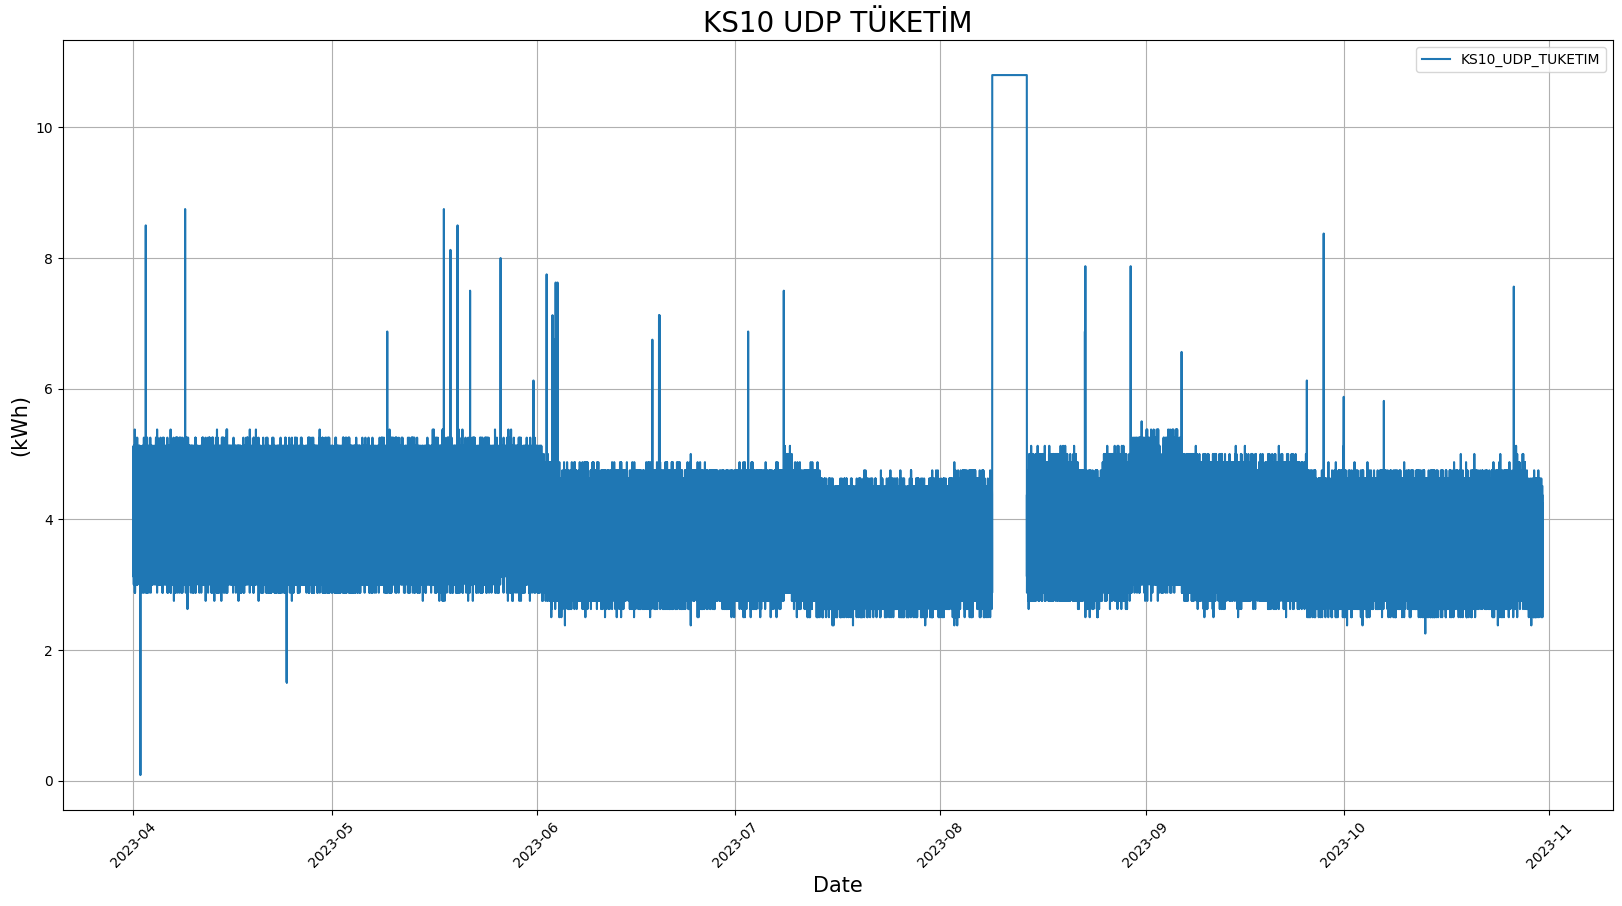

In [10]:
plt.figure(figsize=(20, 10))
plt.plot(UDP_TUKETIM_DF['Timestamp'], UDP_TUKETIM_DF['KS10_UDP_TUKETIM'], label='KS10_UDP_TUKETIM')

plt.xlabel('Date', fontsize=15)
plt.ylabel('(kWh)', fontsize=15)
plt.title('KS10 UDP TÜKETİM', fontsize=20)
plt.grid(True)
plt.xticks(rotation=45)

plt.legend()
plt.show()

In [11]:
# DROP COLUMNS
UDP_TUKETIM_DF = UDP_TUKETIM_DF.drop(columns=['KS10_1_UDP Real Energy Into the Load (kWh)', 'KS10_2_UDP Real Energy Into the Load (kWh)', 'KS10_1_Load_Diff', 'KS10_2_Load_Diff'])
UDP_TUKETIM_DF

,Timestamp,KS10_UDP_TUKETIM
1,2023-04-01 00:10:00,5.000
2,2023-04-01 00:15:00,3.125
3,2023-04-01 00:20:00,4.875
4,2023-04-01 00:25:00,3.125
5,2023-04-01 00:30:00,4.750
...,...,...
60309,2023-10-30 23:50:00,4.250
60310,2023-10-30 23:55:00,2.500
60311,2023-10-31 00:00:00,4.500
60312,NaT,NaN


In [12]:
# save the dataframe as csv file
UDP_TUKETIM_DF.to_csv(os.getcwd() + '/../data/KS VERI/CLEAN_DATA/KS10_UDP_TUKETIM.csv', index=False)